In [76]:
# loading in modules
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from matplotlib.ticker import NullFormatter
from sklearn import manifold

!pip install umap-learn
import umap

     |████████████████████████████████| 90 kB 969 kB/s eta 0:00:01
     |████████████████████████████████| 55 kB 3.1 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86847 sha256=98c193cdc68feca73276ff03d525c9f50e702bba7be3ecb3da606300cd2cf79c
  Stored in directory: /home/ricardo/.cache/pip/wheels/c3/89/96/e196930bc91989b94db4815c8b2ad580f573c2bf31385d1302
Successfully built umap-learn


In [73]:
# creating file path
for sim in range(1):
    path = '/mnt/TCC UFRN/Results/Resultados MCS/results_intel-256_NrV2X_SimPerScriptCampaign_Campaign_1_Fase_2_dataRateBe/JOB0/Sim_'+str(sim)+'/V2X_TCC_Campaign_1_Fase_2.db'
    #dbfile = '/mnt/TCC UFRN/Results/Resultados MCS/results_intel-256_NrV2X_SimPerScriptCampaign_Campaign_1_Fase_2_dataRateBe/JOB0/Sim_0/V2X_TCC_Campaign_1_Fase_2.db'
    # Connect to the database
    con = sqlite3.connect(path)

    cursor = con.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
    list_of_tables = cursor.fetchall()
    #print(list_of_tables)
    df_tables = {}

# Connect to the database
#con = sqlite3.connect(dbfile)

#cursor = con.cursor()
#cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
#list_of_tables = cursor.fetchall()
#print(list_of_tables)
#df_tables = {}

for table in list_of_tables: 
    if table == ('pktTxRx',) or ('avrgPir',) or table == ('thput',) or table == ('avrgPrr',):
        df_tables[table] = pd.read_sql_query("SELECT * FROM "+table[0]+";", con)
con.close()
print(df_tables)

#pir = pd.DataFrame(df_tables[('avrgPir',)], columns = df_tables[('avrgPir',)].columns)
#print(pir)

#vtmetric = []
#vtmetric2 = []
#dfmetricA = df_tables[('psschRxUePhy',)][['rnti','avrgSinr']]
#for irnti in dfmetricA['rnti'].unique():
    #vtmetric2=dfmetricA[(dfmetricA['rnti']==irnti)].dropna()
    #vtmetric2 = np.mean(vtmetric2['avrgSinr'])
    #vtmetric2 = 10*np.log10(vtmetric2)
    #vtmetric = np.append(vtmetric,vtmetric2)
#print(vtmetric)

{('pktTxRx',):          timeSec txRx  nodeId  imsi  pktSizeBytes     srcIp  srcPort  \
0       2.100525   tx      22    23           300  7.0.0.24    49153   
1       2.101692   tx      37    38           300  7.0.0.39    49153   
2       2.101958   tx      20    21           300  7.0.0.22    49153   
3       2.102533   tx      97    98           300  7.0.0.99    49153   
4       2.103027   tx      36    37           300  7.0.0.38    49153   
...          ...  ...     ...   ...           ...       ...      ...   
62626  14.024582   rx     122   123           300  7.0.0.19    49153   
62627  14.024582   rx     123   124           300  7.0.0.19    49153   
62628  14.024582   rx     124   125           300  7.0.0.19    49153   
62629  14.024582   rx     125   126           300  7.0.0.19    49153   
62630  14.024582   rx     128   129           300  7.0.0.19    49153   

           dstIp  dstPort  pktSeqNum  SEED         RUN  
0      225.0.0.0     8000          0     1 -1559049610  
1     

In [154]:
# creating file path
df_metrics = pd.DataFrame()
pir = pd.DataFrame()
distance = pd.DataFrame()
thput = pd.DataFrame()
metric_pir = pd.DataFrame()
metric_distance = pd.DataFrame()
metric_thput = pd.DataFrame()

for sim in range(29):
    path = '/mnt/TCC UFRN/Results/Resultados MCS/results_intel-256_NrV2X_SimPerScriptCampaign_Campaign_1_Fase_2_dataRateBe/JOB0/Sim_'+str(sim)+'/V2X_TCC_Campaign_1_Fase_2.db'
    #print(path)
    #dbfile = '/mnt/TCC UFRN/Results/Resultados MCS/results_intel-256_NrV2X_SimPerScriptCampaign_Campaign_1_Fase_2_dataRateBe/JOB0/Sim_0/V2X_TCC_Campaign_1_Fase_2.db'
    
    # Connect to the database
    con = sqlite3.connect(path)

    cursor = con.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
    list_of_tables = cursor.fetchall()
    #print(list_of_tables)
    df_tables = {}

    for table in list_of_tables: 
        if table == ('pktTxRx',) or ('avrgPir',) or table == ('thput',) or table == ('avrgPrr',):
            df_tables[table] = pd.read_sql_query("SELECT * FROM "+table[0]+";", con)
    con.close()
    
    pir = df_tables[('avrgPir',)]['avrgPirSec']*1000
    metric_pir = pd.concat([metric_pir,pir],axis=0, ignore_index=True)
    distance = df_tables[('avrgPir',)]['TxRxDistance']
    metric_distance = pd.concat([metric_distance,distance],axis=0, ignore_index=True)
    #thput = df_tables[('thput',)]['thputKbps']
    #metric_thput = pd.concat([metric_thput,thput],axis=0, ignore_index=True)
    
print(metric_pir)
print(metric_distance)
df_metrics = pd.concat([metric_distance, metric_pir],axis=1, ignore_index=True)
print(df_metrics)

                 0
0      1062.525000
1      1063.200000
2      1050.225000
3      1044.525000
4      1026.500000
...            ...
59328   111.401685
59329   115.261628
59330   227.493902
59331   105.688830
59332   120.960366

[59333 rows x 1 columns]
                0
0        8.000000
1       78.409183
2      156.204994
3       78.000000
4      156.000000
...           ...
59328   78.000000
59329  156.204994
59330   78.409183
59331    8.000000
59332  156.051274

[59333 rows x 1 columns]
                0            1
0        8.000000  1062.525000
1       78.409183  1063.200000
2      156.204994  1050.225000
3       78.000000  1044.525000
4      156.000000  1026.500000
...           ...          ...
59328   78.000000   111.401685
59329  156.204994   115.261628
59330   78.409183   227.493902
59331    8.000000   105.688830
59332  156.051274   120.960366

[59333 rows x 2 columns]


In [110]:
df_metrics.describe()

,0,1
count,59333.000000,59333.000000
mean,241.383917,100.370239
std,255.311456,53.367364
min,98.087079,4.000000
25%,112.892045,78.000000
50%,139.646104,78.409183
75%,227.495098,156.051274
max,6363.250000,156.204994


In [155]:
def normalize(df):
  sc = StandardScaler()
  normalized_df = sc.fit_transform(df)
  return pd.DataFrame(normalized_df, columns=df.columns)

df_plot = pd.DataFrame()
# Apply k-Means with 4 clusters on the reduced data
kmeans = KMeans(n_clusters=29, random_state=42)
df_plot['kmeans'] = kmeans.fit_predict(normalize(df_metrics))

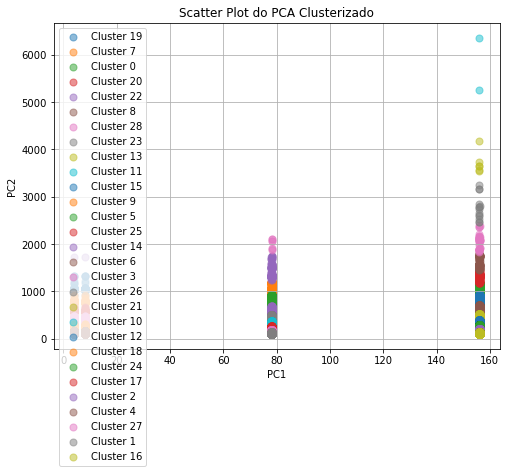

In [156]:
# Create a DataFrame with the principal components and cluster labels
pc_df = pd.DataFrame(data=df_metrics.values, columns=['PC'+str(i) for i in range(1, df_metrics.shape[1]+1)])
pc_df['cluster'] = df_plot['kmeans'].values


# Plot the scatter plot of the two principal components colored by cluster

plt.figure(figsize=(8, 6))
for cluster in pc_df['cluster'].unique():
    subset = pc_df[pc_df['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], s=50, label=f'Cluster {cluster}', alpha=0.5)
plt.title('Scatter Plot do PCA Clusterizado')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()